In [24]:
from datetime import datetime
import pandas as pd
import time
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

<b> Importing Our Real Estate Data </b>

In [25]:
# Link storing the entirety of Redfin's real estate data based on zip code.

redfin_url = 'https://redfin-public-data.s3.us-west-2.amazonaws.com/redfin_market_tracker/zip_code_market_tracker.tsv000.gz'

# This block of code tracks the amount of time it takes to read the above file.
startTime = time.time()
redfin_df = pd.read_csv(redfin_url, compression = 'gzip', sep = '\t', on_bad_lines = 'skip')
executionTime = (time.time() - startTime)
print('Time to Load (Minutes): ' + str(round(executionTime / 60, 2)))
print('# of Rows:', len(redfin_df))
print('# of Cols:', len(redfin_df.columns))
redfin_df.head()

Time to Load (Minutes): 2.79
# of Rows: 6305970
# of Cols: 58


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2021-08-01,2021-10-31,90,zip code,2,20593,f,Zip Code: 48301,NaN,Michigan,MI,All Residential,-1,587000.0,-0.021504,0.118095,639475.0,0.162682,0.117963,219.715218,-0.083863,0.066802,232.082328,0.031211,0.064210,78.0,-0.123596,-0.103448,26.0,0.083333,0.04,88.0,-0.111111,0.047619,48.0,-0.127273,-0.157895,NaN,NaN,NaN,21.0,0.0,-16.0,0.988412,0.005453,0.021932,0.333333,0.041199,0.080460,NaN,NaN,NaN,0.461538,0.253205,0.061538,"Warren, MI",47664,2022-10-16 14:38:47
1,2015-05-01,2015-07-31,90,zip code,2,29924,f,Zip Code: 70076,NaN,Louisiana,LA,Single Family Residential,6,85000.0,0.000000,NaN,NaN,NaN,NaN,56.666667,0.000000,NaN,NaN,NaN,NaN,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,NaN,NaN,NaN,NaN,354.0,0.0,NaN,1.011905,0.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"New Orleans, LA",35380,2022-10-16 14:38:47
2,2018-08-01,2018-10-31,90,zip code,2,5101,f,Zip Code: 14222,NaN,New York,NY,Condo/Co-op,3,215000.0,-0.104167,0.433333,199900.0,-0.087215,0.212250,217.973986,0.000000,-0.168793,215.706134,-0.075105,-0.115456,8.0,-0.200000,7.000000,NaN,NaN,NaN,4.0,0.333333,0.333333,5.0,0.666667,0.250000,NaN,NaN,NaN,16.0,1.0,-8.0,0.982364,0.000397,-0.018303,0.250000,-0.050000,-0.750000,NaN,NaN,NaN,NaN,NaN,NaN,"Buffalo, NY",15380,2022-10-16 14:38:47
3,2016-07-01,2016-09-30,90,zip code,2,13900,f,Zip Code: 32966,NaN,Florida,FL,Condo/Co-op,3,132000.0,0.178571,0.211009,135900.0,0.006667,0.066719,89.137182,0.011225,0.138264,101.631117,0.072495,0.148189,40.0,0.025641,0.212121,9.0,0.000000,0.00,39.0,0.054054,0.026316,44.0,0.047619,0.157895,NaN,NaN,NaN,100.0,-14.0,21.0,0.957557,0.010123,0.007523,0.075000,0.049359,0.014394,NaN,NaN,NaN,0.333333,0.222222,0.222222,"Sebastian, FL",42680,2022-10-16 14:38:47
4,2020-09-01,2020-11-30,90,zip code,2,16709,f,Zip Code: 39180,NaN,Mississippi,MS,All Residential,-1,161950.0,-0.264031,2.373958,190700.0,0.095977,0.122425,82.043081,0.112273,3.507242,82.043081,0.053358,0.125162,4.0,1.000000,-0.200000,2.0,NaN,1.00,6.0,0.200000,1.000000,10.0,-0.166667,-0.333333,NaN,NaN,NaN,99.0,-2.5,27.0,0.975751,-0.039435,0.039684,0.000000,-0.500000,-0.200000,NaN,NaN,NaN,0.000000,NaN,0.000000,"Vicksburg, MS",46980,2022-10-16 14:38:47


In [26]:
# Filtering by State Code (Foreshadowing)

state_code = 'CA'
redfin_filter = redfin_df.loc[redfin_df['state_code'] == state_code]
print('# of Rows:', len(redfin_filter))
redfin_filter.head()

# of Rows: 628096


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
7,2018-03-01,2018-05-31,90,zip code,2,39017,f,Zip Code: 94110,NaN,California,CA,Townhouse,13,1125000.0,0.384615,-0.114696,1399000.0,0.244662,-0.220613,1010.413294,0.144165,0.408081,982.112958,0.060036,0.045287,3.0,0.500000,0.500000,1.0,0.000000,NaN,5.0,0.250000,-0.285714,3.0,0.500000,-0.400000,NaN,NaN,NaN,31.0,0.0,12.0,1.137716,0.063511,-0.051368,0.666667,0.166667,0.166667,NaN,NaN,NaN,1.000000,0.000000,NaN,"San Francisco, CA",41884,2022-10-16 14:38:47
14,2013-11-01,2014-01-31,90,zip code,2,38787,f,Zip Code: 93550,NaN,California,CA,All Residential,-1,155000.0,-0.031250,0.215686,165000.0,0.000000,0.223128,110.065915,-0.015818,0.455741,110.199862,0.017854,0.268241,150.0,-0.226804,-0.206349,39.0,-0.025000,0.083333,193.0,0.066298,0.122093,240.0,0.105991,0.206030,NaN,NaN,NaN,81.0,15.0,-17.0,1.017429,-0.016648,0.006412,0.453333,-0.051821,0.014180,NaN,NaN,NaN,0.333333,0.083333,-0.055556,"Los Angeles, CA",31084,2022-10-16 14:38:47
23,2015-08-01,2015-10-31,90,zip code,2,37844,f,Zip Code: 91362,NaN,California,CA,All Residential,-1,729750.0,-0.014517,0.167600,699000.0,-0.055278,0.005755,348.466802,0.000759,0.077079,353.383459,-0.007264,0.054870,172.0,-0.044444,0.202797,37.0,0.088235,0.000000,166.0,-0.011905,0.037500,146.0,0.081481,-0.184358,NaN,NaN,NaN,33.5,-2.5,-8.5,0.978894,0.002644,-0.001229,0.168605,0.007494,0.007765,NaN,NaN,NaN,0.405405,-0.035771,0.081081,"Oxnard, CA",37100,2022-10-16 14:38:47
25,2019-08-01,2019-10-31,90,zip code,2,37951,f,Zip Code: 91748,NaN,California,CA,Single Family Residential,6,660000.0,0.000000,0.047619,680000.0,0.017203,-0.027182,377.057886,0.002603,0.034814,376.556034,-0.036201,0.017386,57.0,-0.033898,0.036364,21.0,0.235294,0.615385,85.0,-0.076087,0.197183,88.0,-0.063830,0.100000,NaN,NaN,NaN,55.0,0.0,-12.5,0.986156,-0.002161,0.011206,0.263158,0.008921,0.044976,NaN,NaN,NaN,0.142857,0.084034,-0.010989,"Los Angeles, CA",31084,2022-10-16 14:38:47
27,2016-01-01,2016-03-31,90,zip code,2,37923,f,Zip Code: 91702,NaN,California,CA,Single Family Residential,6,410000.0,-0.012048,0.142061,418000.0,-0.002946,0.058362,290.215589,0.023505,-0.026327,297.633588,-0.001053,0.057685,53.0,0.081633,-0.070175,21.0,-0.045455,-0.416667,94.0,0.205128,-0.020833,56.0,0.142857,-0.066667,NaN,NaN,NaN,45.0,-17.0,-2.0,0.999372,-0.004978,0.022579,0.301887,0.036581,0.108904,NaN,NaN,NaN,0.428571,0.064935,0.011905,"Los Angeles, CA",31084,2022-10-16 14:38:47


<b>Auditing Redfin Data</b>

In [27]:
redfin_filter.describe()

,period_duration,region_type_id,table_id,city,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code
count,628096.0,628096.0,628096.000000,0.0,628096.000000,6.280960e+05,604951.000000,565448.000000,5.933020e+05,568984.000000,538091.000000,6.254210e+05,602248.000000,562682.000000,5.917690e+05,567463.000000,536595.000000,628096.000000,604951.000000,565448.000000,501569.000000,447932.000000,437094.000000,593351.000000,569029.000000,538127.000000,567536.000000,540949.000000,513713.000000,0.0,0.0,0.0,623133.000000,599932.000000,560169.000000,627943.000000,604802.000000,565286.000000,628096.000000,604951.000000,565448.000000,0.0,0.0,0.0,501569.000000,447932.000000,437094.000000,628096.000000
mean,90.0,2.0,38643.720602,NaN,4.067356,6.387627e+05,0.019227,0.531588,6.714935e+05,0.036389,0.155775,4.594219e+02,0.115491,0.654551,5.022225e+02,0.107870,0.263788,37.833006,0.055777,0.203619,14.406177,0.183123,0.228587,46.200300,0.046612,0.155187,31.177006,0.066645,0.145396,NaN,NaN,NaN,52.713638,-0.272489,-4.665570,1.000040,0.000171,0.005110,0.374964,0.001203,0.032203,NaN,NaN,NaN,0.389216,-0.001754,0.005615,34701.014214
std,0.0,0.0,766.376799,NaN,4.288791,6.031422e+05,0.360583,289.245953,2.041643e+06,5.075135,4.559348,8.226562e+03,18.355303,239.975519,1.448951e+04,13.270337,14.887530,51.847674,0.404050,1.779325,17.124977,0.831910,1.080726,60.855778,0.393958,1.256824,45.907544,0.472405,1.108671,NaN,NaN,NaN,139.844606,104.496699,165.142276,0.050392,0.024783,0.048172,0.288756,0.149718,0.284741,NaN,NaN,NaN,0.299528,0.324684,0.339268,9423.362708
min,90.0,2.0,37448.000000,NaN,-1.000000,5.750000e+02,-0.994260,-0.998148,1.230000e+02,-0.999212,-0.999629,1.090450e-02,-0.999619,-0.999909,1.671196e-01,-0.999804,-0.999930,1.000000,-0.972973,-0.967742,1.000000,-0.970149,-0.966667,1.000000,-0.941176,-0.976190,1.000000,-0.937500,-0.977778,NaN,NaN,NaN,1.000000,-20474.000000,-40936.500000,0.500000,-0.923224,-1.257353,0.000000,-1.000000,-1.000000,NaN,NaN,NaN,0.000000,-1.000000,-2.000000,11244.000000
25%,90.0,2.0,37981.000000,NaN,-1.000000,3.065000e+05,-0.019025,0.005566,3.290000e+05,-0.020800,0.007112,2.021792e+02,-0.013229,0.016378,2.158130e+02,-0.013384,0.021050,3.000000,-0.115385,-0.214286,2.000000,-0.259259,-0.258065,5.000000,-0.137566,-0.209302,4.000000,-0.142857,-0.346154,NaN,NaN,NaN,18.000000,-4.000000,-17.000000,0.980378,-0.005000,-0.010825,0.142857,-0.035714,-0.083333,NaN,NaN,NaN,0.142857,-0.139535,-0.159664,31084.000000
50%,90.0,2.0,38548.000000,NaN,4.000000,4.900000e+05,0.000000,0.095797,5.100000e+05,0.000000,0.088513,3.207547e+02,0.000000,0.091453,3.334846e+02,0.002162,0.084940,14.000000,0.000000,0.000000,7.000000,0.000000,0.000000,19.000000,0.000000,0.000000,13.000000,0.000000,-0.036364,NaN,NaN,NaN,34.000000,0.000000,-1.500000,0.996455,0.000000,0.003351,0.336957,0.000000,0.008964,NaN,NaN,NaN,0.375000,0.000000,0.000000,37100.000000
75%,90.0,2.0,39279.000000,NaN,6.000000,7.700000e+05,0.036430,0.211268,7.945000e+05,0.037858,0.191251,4.761905e+02,0.030075,0.192308,4.856144e+02,0.029513,0.170156,55.000000,0.130435,0.279070,21.000000,0.346154,0.400000,67.000000,0.145161,0.242424,41.000000,0.155963,0.314286,NaN,NaN,NaN,56.000000,4.000000,11.000000,1.014388,0.005439,0.021373,0.553846,0.038806,0.158209,NaN,NaN,NaN,0.571429,0.133333,0.1666

In [28]:
# Extracting numeric zip code from 'zip Code: xxxxx' string in 'region' column.

redfin_filter['zipcode'] = redfin_filter.apply(lambda x: x['region'].split(':')[1].strip(), axis=1)
redfin_filter.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode
7,2018-03-01,2018-05-31,90,zip code,2,39017,f,Zip Code: 94110,NaN,California,CA,Townhouse,13,1125000.0,0.384615,-0.114696,1399000.0,0.244662,-0.220613,1010.413294,0.144165,0.408081,982.112958,0.060036,0.045287,3.0,0.500000,0.500000,1.0,0.000000,NaN,5.0,0.250000,-0.285714,3.0,0.500000,-0.400000,NaN,NaN,NaN,31.0,0.0,12.0,1.137716,0.063511,-0.051368,0.666667,0.166667,0.166667,NaN,NaN,NaN,1.000000,0.000000,NaN,"San Francisco, CA",41884,2022-10-16 14:38:47,94110
14,2013-11-01,2014-01-31,90,zip code,2,38787,f,Zip Code: 93550,NaN,California,CA,All Residential,-1,155000.0,-0.031250,0.215686,165000.0,0.000000,0.223128,110.065915,-0.015818,0.455741,110.199862,0.017854,0.268241,150.0,-0.226804,-0.206349,39.0,-0.025000,0.083333,193.0,0.066298,0.122093,240.0,0.105991,0.206030,NaN,NaN,NaN,81.0,15.0,-17.0,1.017429,-0.016648,0.006412,0.453333,-0.051821,0.014180,NaN,NaN,NaN,0.333333,0.083333,-0.055556,"Los Angeles, CA",31084,2022-10-16 14:38:47,93550
23,2015-08-01,2015-10-31,90,zip code,2,37844,f,Zip Code: 91362,NaN,California,CA,All Residential,-1,729750.0,-0.014517,0.167600,699000.0,-0.055278,0.005755,348.466802,0.000759,0.077079,353.383459,-0.007264,0.054870,172.0,-0.044444,0.202797,37.0,0.088235,0.000000,166.0,-0.011905,0.037500,146.0,0.081481,-0.184358,NaN,NaN,NaN,33.5,-2.5,-8.5,0.978894,0.002644,-0.001229,0.168605,0.007494,0.007765,NaN,NaN,NaN,0.405405,-0.035771,0.081081,"Oxnard, CA",37100,2022-10-16 14:38:47,91362
25,2019-08-01,2019-10-31,90,zip code,2,37951,f,Zip Code: 91748,NaN,California,CA,Single Family Residential,6,660000.0,0.000000,0.047619,680000.0,0.017203,-0.027182,377.057886,0.002603,0.034814,376.556034,-0.036201,0.017386,57.0,-0.033898,0.036364,21.0,0.235294,0.615385,85.0,-0.076087,0.197183,88.0,-0.063830,0.100000,NaN,NaN,NaN,55.0,0.0,-12.5,0.986156,-0.002161,0.011206,0.263158,0.008921,0.044976,NaN,NaN,NaN,0.142857,0.084034,-0.010989,"Los Angeles, CA",31084,2022-10-16 14:38:47,91748
27,2016-01-01,2016-03-31,90,zip code,2,37923,f,Zip Code: 91702,NaN,California,CA,Single Family Residential,6,410000.0,-0.012048,0.142061,418000.0,-0.002946,0.058362,290.215589,0.023505,-0.026327,297.633588,-0.001053,0.057685,53.0,0.081633,-0.070175,21.0,-0.045455,-0.416667,94.0,0.205128,-0.020833,56.0,0.142857,-0.066667,NaN,NaN,NaN,45.0,-17.0,-2.0,0.999372,-0.004978,0.022579,0.301887,0.036581,0.108904,NaN,NaN,NaN,0.428571,0.064935,0.011905,"Los Angeles, CA",31084,2022-10-16 14:38:47,91702


In [29]:
# Checking NaN count for 'city' column.

print('# of Rows:', len(redfin_filter))
print('# of NaN:', redfin_filter['city'].isna().sum())

# of Rows: 628096
# of NaN: 628096


In [30]:
# Dropping 'city' column due to having no city name values present.

redfin_filter = redfin_filter.drop(columns=['city'])
redfin_filter.head()

# We will eventually need an additional source of data to go along with the Redfin dataframe.

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode
7,2018-03-01,2018-05-31,90,zip code,2,39017,f,Zip Code: 94110,California,CA,Townhouse,13,1125000.0,0.384615,-0.114696,1399000.0,0.244662,-0.220613,1010.413294,0.144165,0.408081,982.112958,0.060036,0.045287,3.0,0.500000,0.500000,1.0,0.000000,NaN,5.0,0.250000,-0.285714,3.0,0.500000,-0.400000,NaN,NaN,NaN,31.0,0.0,12.0,1.137716,0.063511,-0.051368,0.666667,0.166667,0.166667,NaN,NaN,NaN,1.000000,0.000000,NaN,"San Francisco, CA",41884,2022-10-16 14:38:47,94110
14,2013-11-01,2014-01-31,90,zip code,2,38787,f,Zip Code: 93550,California,CA,All Residential,-1,155000.0,-0.031250,0.215686,165000.0,0.000000,0.223128,110.065915,-0.015818,0.455741,110.199862,0.017854,0.268241,150.0,-0.226804,-0.206349,39.0,-0.025000,0.083333,193.0,0.066298,0.122093,240.0,0.105991,0.206030,NaN,NaN,NaN,81.0,15.0,-17.0,1.017429,-0.016648,0.006412,0.453333,-0.051821,0.014180,NaN,NaN,NaN,0.333333,0.083333,-0.055556,"Los Angeles, CA",31084,2022-10-16 14:38:47,93550
23,2015-08-01,2015-10-31,90,zip code,2,37844,f,Zip Code: 91362,California,CA,All Residential,-1,729750.0,-0.014517,0.167600,699000.0,-0.055278,0.005755,348.466802,0.000759,0.077079,353.383459,-0.007264,0.054870,172.0,-0.044444,0.202797,37.0,0.088235,0.000000,166.0,-0.011905,0.037500,146.0,0.081481,-0.184358,NaN,NaN,NaN,33.5,-2.5,-8.5,0.978894,0.002644,-0.001229,0.168605,0.007494,0.007765,NaN,NaN,NaN,0.405405,-0.035771,0.081081,"Oxnard, CA",37100,2022-10-16 14:38:47,91362
25,2019-08-01,2019-10-31,90,zip code,2,37951,f,Zip Code: 91748,California,CA,Single Family Residential,6,660000.0,0.000000,0.047619,680000.0,0.017203,-0.027182,377.057886,0.002603,0.034814,376.556034,-0.036201,0.017386,57.0,-0.033898,0.036364,21.0,0.235294,0.615385,85.0,-0.076087,0.197183,88.0,-0.063830,0.100000,NaN,NaN,NaN,55.0,0.0,-12.5,0.986156,-0.002161,0.011206,0.263158,0.008921,0.044976,NaN,NaN,NaN,0.142857,0.084034,-0.010989,"Los Angeles, CA",31084,2022-10-16 14:38:47,91748
27,2016-01-01,2016-03-31,90,zip code,2,37923,f,Zip Code: 91702,California,CA,Single Family Residential,6,410000.0,-0.012048,0.142061,418000.0,-0.002946,0.058362,290.215589,0.023505,-0.026327,297.633588,-0.001053,0.057685,53.0,0.081633,-0.070175,21.0,-0.045455,-0.416667,94.0,0.205128,-0.020833,56.0,0.142857,-0.066667,NaN,NaN,NaN,45.0,-17.0,-2.0,0.999372,-0.004978,0.022579,0.301887,0.036581,0.108904,NaN,NaN,NaN,0.428571,0.064935,0.011905,"Los Angeles, CA",31084,2022-10-16 14:38:47,91702


In [31]:
# Determining latest observation period. 

redfin_filter = redfin_filter.copy()
print('Latest Observation Period:', redfin_filter['period_end'].max())
latest_period = redfin_filter['period_end'].max()

# Establishing the above criteria with a new column.

redfin_filter['latest_period'] = redfin_filter.apply(
    lambda x: True if x['period_end'] == latest_period  else False, axis = 1)

# Formatting Date
date_str = datetime.today().strftime('%Y-%m')
print('Current Year/Month:', date_str)

redfin_filter.head()

Latest Observation Period: 2022-09-30
Current Year/Month: 2022-10


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode,latest_period
7,2018-03-01,2018-05-31,90,zip code,2,39017,f,Zip Code: 94110,California,CA,Townhouse,13,1125000.0,0.384615,-0.114696,1399000.0,0.244662,-0.220613,1010.413294,0.144165,0.408081,982.112958,0.060036,0.045287,3.0,0.500000,0.500000,1.0,0.000000,NaN,5.0,0.250000,-0.285714,3.0,0.500000,-0.400000,NaN,NaN,NaN,31.0,0.0,12.0,1.137716,0.063511,-0.051368,0.666667,0.166667,0.166667,NaN,NaN,NaN,1.000000,0.000000,NaN,"San Francisco, CA",41884,2022-10-16 14:38:47,94110,False
14,2013-11-01,2014-01-31,90,zip code,2,38787,f,Zip Code: 93550,California,CA,All Residential,-1,155000.0,-0.031250,0.215686,165000.0,0.000000,0.223128,110.065915,-0.015818,0.455741,110.199862,0.017854,0.268241,150.0,-0.226804,-0.206349,39.0,-0.025000,0.083333,193.0,0.066298,0.122093,240.0,0.105991,0.206030,NaN,NaN,NaN,81.0,15.0,-17.0,1.017429,-0.016648,0.006412,0.453333,-0.051821,0.014180,NaN,NaN,NaN,0.333333,0.083333,-0.055556,"Los Angeles, CA",31084,2022-10-16 14:38:47,93550,False
23,2015-08-01,2015-10-31,90,zip code,2,37844,f,Zip Code: 91362,California,CA,All Residential,-1,729750.0,-0.014517,0.167600,699000.0,-0.055278,0.005755,348.466802,0.000759,0.077079,353.383459,-0.007264,0.054870,172.0,-0.044444,0.202797,37.0,0.088235,0.000000,166.0,-0.011905,0.037500,146.0,0.081481,-0.184358,NaN,NaN,NaN,33.5,-2.5,-8.5,0.978894,0.002644,-0.001229,0.168605,0.007494,0.007765,NaN,NaN,NaN,0.405405,-0.035771,0.081081,"Oxnard, CA",37100,2022-10-16 14:38:47,91362,False
25,2019-08-01,2019-10-31,90,zip code,2,37951,f,Zip Code: 91748,California,CA,Single Family Residential,6,660000.0,0.000000,0.047619,680000.0,0.017203,-0.027182,377.057886,0.002603,0.034814,376.556034,-0.036201,0.017386,57.0,-0.033898,0.036364,21.0,0.235294,0.615385,85.0,-0.076087,0.197183,88.0,-0.063830,0.100000,NaN,NaN,NaN,55.0,0.0,-12.5,0.986156,-0.002161,0.011206,0.263158,0.008921,0.044976,NaN,NaN,NaN,0.142857,0.084034,-0.010989,"Los Angeles, CA",31084,2022-10-16 14:38:47,91748,False
27,2016-01-01,2016-03-31,90,zip code,2,37923,f,Zip Code: 91702,California,CA,Single Family Residential,6,410000.0,-0.012048,0.142061,418000.0,-0.002946,0.058362,290.215589,0.023505,-0.026327,297.633588,-0.001053,0.057685,53.0,0.081633,-0.070175,21.0,-0.045455,-0.416667,94.0,0.205128,-0.020833,56.0,0.142857,-0.066667,NaN,NaN,NaN,45.0,-17.0,-2.0,0.999372,-0.004978,0.022579,0.301887,0.036581,0.108904,NaN,NaN,NaN,0.428571,0.064935,0.011905,"Los Angeles, CA",31084,2022-10-16 14:38:47,91702,False


<b>Zip Code Administrative Subdivision Data</b>

In [32]:
# This cell exists to provide valid city names and expedite loading times for data visualization software.
# We are observing a subset of zipcodes with included administrative subdivision data.

geo_data_url = 'https://raw.githubusercontent.com/scpike/us-state-county-zip/master/geo-data.csv'
geo_df = pd.read_csv(geo_data_url)
print('# of Rows:', len(geo_df))
print('# of Cols:', len(geo_df.columns))
geo_df.head()

# of Rows: 33103
# of Cols: 6


,state_fips,state,state_abbr,zipcode,county,city
0,1,Alabama,AL,35004,St. Clair,Acmar
1,1,Alabama,AL,35005,Jefferson,Adamsville
2,1,Alabama,AL,35006,Jefferson,Adger
3,1,Alabama,AL,35007,Shelby,Keystone
4,1,Alabama,AL,35010,Tallapoosa,New site


<b>Region of Focus: Bay Area</b>

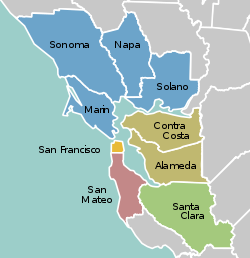

In [33]:
from IPython.display import display, Image
display(Image('https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/California_Bay_Area_county_map_%28zoom%26color%29.svg/250px-California_Bay_Area_county_map_%28zoom%26color%29.svg.png'))

<b> Data Filtering/Cleaning from GitHub CSV (Geo Data)

In [34]:
# Filtering the Bay Area by its state and nine most prominent counties.

geo_df_county = geo_df.loc[(geo_df['state_abbr'] == 'CA') &
                           (geo_df['county'].isin(['San Francisco', 'San Mateo', 'Santa Clara', 
                                                   'Alameda', 'Contra Costa', 'Solano', 
                                                   'Napa', 'Sonoma', 'Marin']))]

In [35]:
# This cell exists to determine if zip codes from the imported GitHub csv are numeric. If not they are invalid.

geo_df_county['valid_zip_code'] = geo_df_county.apply(lambda x: x['zipcode'].isnumeric(), axis=1)
print('Dataset:')
print(geo_df_county.groupby(['valid_zip_code', 'county'])['zipcode'].count())
print(' ')
print('Invalid Zip Codes:', geo_df_county.loc[geo_df_county['valid_zip_code'] == False]['zipcode'].unique())

# As it can be seen, all of the invalid zip codes contain letters.

Dataset:
valid_zip_code  county       
False           Alameda           4
                Contra Costa      1
                Marin             2
                San Francisco     2
                San Mateo         3
                Santa Clara       1
True            Alameda          46
                Contra Costa     34
                Marin            27
                Napa              8
                San Francisco    26
                San Mateo        30
                Santa Clara      54
                Solano           14
                Sonoma           37
Name: zipcode, dtype: int64
 
Invalid Zip Codes: ['940HH' '941HH' '941XX' '943HH' '944HH' '945HH' '945XX' '946HH' '947HH'
 '948HH' '949HH' '949XX' '951HH']


In [36]:
# Filtering only valid (numeric) zip codes.

geo_df_county_valid = geo_df_county.loc[geo_df_county['valid_zip_code'] == True]
print('# of Valid Zip Codes:', len(geo_df_county_valid))
geo_df_county_valid.head()

# of Valid Zip Codes: 276


,state_fips,state,state_abbr,zipcode,county,city,valid_zip_code
2832,6,California,CA,94002,San Mateo,Belmont,True
2833,6,California,CA,94005,San Mateo,Brisbane,True
2834,6,California,CA,94010,San Mateo,Hillsborough,True
2835,6,California,CA,94014,San Mateo,Colma,True
2836,6,California,CA,94015,San Mateo,Daly city,True


<b>Joining both sources of data.</b>

In [37]:
# Merging Redfin data with GitHub csv data (Geo Data).

redfin_geo_merge = pd.merge(
    redfin_filter,
    geo_df_county_valid[['zipcode', 'city', 'county']],
    how = 'inner', # Inner joining the Redfin and Github csv data.
    on = ['zipcode'] # Joining these two dataframes on the 'zipcode' column.
)
print('# of Rows:', len(redfin_geo_merge))
redfin_geo_merge.head()

# of Rows: 126056


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode,latest_period,city,county
0,2018-03-01,2018-05-31,90,zip code,2,39017,f,Zip Code: 94110,California,CA,Townhouse,13,1125000.0,0.384615,-0.114696,1399000.0,0.244662,-0.220613,1010.413294,0.144165,0.408081,982.112958,0.060036,0.045287,3.0,0.500000,0.500000,1.0,0.000000,NaN,5.0,0.250000,-0.285714,3.0,0.500000,-0.400000,NaN,NaN,NaN,31.0,0.0,12.0,1.137716,0.063511,-0.051368,0.666667,0.166667,0.166667,NaN,NaN,NaN,1.000000,0.000000,NaN,"San Francisco, CA",41884,2022-10-16 14:38:47,94110,False,San francisco,San Francisco
1,2014-05-01,2014-07-31,90,zip code,2,39017,f,Zip Code: 94110,California,CA,Condo/Co-op,3,925000.0,-0.026316,0.009955,824000.0,-0.017878,0.031289,868.544601,-0.013185,0.093539,846.293984,0.042096,0.227368,53.0,-0.208955,-0.196970,19.0,-0.050000,-0.208333,66.0,-0.164557,-0.120000,19.0,-0.136364,-0.050000,NaN,NaN,NaN,14.0,1.0,1.0,1.141496,0.000822,0.037895,0.867925,0.076880,0.049743,NaN,NaN,NaN,0.368421,-0.181579,-0.298246,"San Francisco, CA",41884,2022-10-16 14:38:47,94110,False,San francisco,San Francisco
2,2017-01-01,2017-03-31,90,zip code,2,39017,f,Zip Code: 94110,California,CA,Multi-Family (2-4 Unit),4,1250000.0,0.219512,-0.166667,1598000.0,-0.086857,-0.136216,579.901153,0.171818,-0.011991,624.687093,-0.141563,0.107553,9.0,0.000000,0.285714,7.0,2.500000,0.166667,25.0,0.923077,0.470588,19.0,0.461538,0.461538,NaN,NaN,NaN,114.0,0.0,72.0,1.003193,-0.002860,-0.179103,0.333333,-0.111111,-0.380952,NaN,NaN,NaN,0.285714,0.285714,-0.047619,"San Francisco, CA",41884,2022-10-16 14:38:47,94110,False,San francisco,San Francisco
3,2016-01-01,2016-03-31,90,zip code,2,39017,f,Zip Code: 94110,California,CA,Multi-Family (2-4 Unit),4,1500000.0,0.000000,0.200000,1850000.0,0.156973,0.506515,586.939103,-0.210868,0.128002,564.024390,-0.029138,0.051089,7.0,0.400000,-0.631579,6.0,1.000000,0.200000,17.0,0.307692,-0.320000,13.0,-0.071429,0.181818,NaN,NaN,NaN,42.0,21.0,17.0,1.182297,0.057361,0.115873,0.714286,0.114286,0.187970,NaN,NaN,NaN,0.333333,-0.333333,-0.066667,"San Francisco, CA",41884,2022-10-16 14:38:47,94110,False,San francisco,San Francisco
4,2018-03-01,2018-05-31,90,zip code,2,39017,f,Zip Code: 94110,California,CA,Multi-Family (2-4 Unit),4,1770000.0,0.018705,0.340909,1397500.0,-0.067712,-0.097222,804.597701,-0.049796,0.182062,648.438845,-0.110433,0.026107,24.0,0.714286,0.846154,7.0,0.166667,-0.125000,19.0,-0.173913,-0.136364,8.0,-0.200000,-0.428571,NaN,NaN,NaN,21.5,-2.5,-3.5,1.067929,0.014080,0.010596,0.625000,-0.017857,0.086538,NaN,NaN,NaN,0.285714,-0.380952,0.160714,"San Francisco, CA",41884,2022-10-16 14:38:47,94110,False,San francisco,San Francisco


<b>Exporting Data to be Used in Tableau</b>

In [45]:
# Putting the data in CSV format.
redfin_geo_merge.to_csv('bay_area_real_estate.csv'.format(state_code, date_str), index = False)